## Segmenting and Clustering Neighborhoods in Toronto

Importing all libraris I need in this assigment:

In [196]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [197]:
!pip install lxml

In [198]:
from lxml import html

#### Question 1:

the following part is given for readiing the table from Wikipedia

In [199]:
df=pd.read_html(r"https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")

In [200]:
df_toronto=df[0]

In [201]:
df_toronto.shape

(180, 3)

In [202]:
df_toronto.head(10)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


for removing rows with Not assigned on the "Borough" column: 

In [203]:
df_toronto=df_toronto[df_toronto.Borough!='Not assigned']
df_toronto = df_toronto.reset_index(drop=True)

In [204]:
df_toronto.head(5)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


for replacing data 'Not assigned' in the "Neighborhood" column with data from the "Borough" column: 

In [205]:
df_toronto.Neighbourhood = np.where(df_toronto.Neighbourhood != 'Not assigned',df_toronto.Neighbourhood,df_toronto.Borough)
df_toronto.head(12)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


print the number of rows of your dataframe:

In [206]:
df_toronto.shape

(103, 3)

#### Question 2:

in this part we are reading the eographical coordinates of every neighborhood in toronto

In [207]:
df1=pd.read_csv(r"http://cocl.us/Geospatial_data")

In [208]:
df1.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [209]:
df_new = pd.merge(df_toronto,
                 df1[['Postal Code', 'Latitude', 'Longitude']],
                 on='Postal Code', 
                 how='left')

In [210]:
df_new.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


#### Question 3:

In this question I will expolore neighborhood in downtown Toroneo. 

In the first part I will explore a specific area: the Univirsity of Toronto (UoT). Here I conclude the following: 

1) 34 venues were returned by Foursquare at this area

2) Most venues are located in the same street

3) The most frequent category of venues in this area is "cafe"

In the second part of the assignment I will explore and cluster the neighborhoods in Toronto. In this second part I found 3 clusters with single neighborhood, and the 4th cluster contains all the rest. 

**Part (A):** First, Let's find  the coordinates of the borough "Tornoto" 

In [211]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [212]:
df_new.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [213]:
Downtown_data = df_new[df_new['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
Downtown_data.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306


In [214]:
CLIENT_ID = '3YE122SBZW2UXKT3OT2NHF53ZCVIVAGCQUY12PKWO1JG34KA' # your Foursquare ID
CLIENT_SECRET = 'MX25MFGNMBQNNLFCW4FPI2ZXG0HDVWG2YW5FIIH3H0UIRSD1' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3YE122SBZW2UXKT3OT2NHF53ZCVIVAGCQUY12PKWO1JG34KA
CLIENT_SECRET:MX25MFGNMBQNNLFCW4FPI2ZXG0HDVWG2YW5FIIH3H0UIRSD1


In [215]:
Downtown_data.loc[11, 'Neighbourhood']

'University of Toronto, Harbord'

In [216]:
neighborhood_latitude = Downtown_data.loc[11, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Downtown_data.loc[11, 'Longitude'] # neighborhood longitude value

neighborhood_name = Downtown_data.loc[11, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of University of Toronto, Harbord are 43.6626956, -79.4000493.


In [217]:
# create map of venues in University of Toronto 
map_UoT = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=14)

The following add to the map (called map_tor) labels for every neighbouthood in the boright of Tornoto 

In [218]:
LIMIT=100
radius=500
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=3YE122SBZW2UXKT3OT2NHF53ZCVIVAGCQUY12PKWO1JG34KA&client_secret=MX25MFGNMBQNNLFCW4FPI2ZXG0HDVWG2YW5FIIH3H0UIRSD1&v=20180604&ll=43.6626956,-79.4000493&radius=500&limit=100'

In [219]:
results = requests.get(url).json()


In [220]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [221]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Yasu,Japanese Restaurant,43.662837,-79.403217
1,Rasa,Restaurant,43.662757,-79.403988
2,The Dessert Kitchen,Dessert Shop,43.662823,-79.402746
3,Almond Butterfly,Bakery,43.662836,-79.403365
4,Her Father's Cider Bar + Kitchen,Beer Bar,43.662448,-79.404703


In [222]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

34 venues were returned by Foursquare.


In [223]:
# add markers to map
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_UoT)  
    
map_UoT

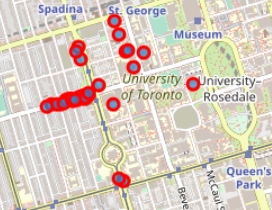


**1st conclusion:**

Most vanues in the Univirsity of Toronto area are located on Harbord st. 

In [143]:
UoT_grouped = nearby_venues.groupby('categories').count().reset_index()

In [144]:
UoT_grouped.sort_values(by=['name'], inplace=True,ascending=False)
UoT_grouped.reset_index().head()

,index,categories,name,lat,lng
0,6,Café,5,5,5
1,0,Bakery,2,2,2
2,14,Japanese Restaurant,2,2,2
3,2,Bar,2,2,2
4,5,Bookstore,2,2,2


**2nd conclusion:**

Most vanues in the Univirsity of Toronto are at the type of "Cafe" (not surprising since students must eat)

**Part (B)**: clustering neighborhoods in downtown Toronto 

In [224]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'categories']
    
    return(nearby_venues)

In [225]:
downtown_venues = getNearbyVenues(names=Downtown_data['Neighbourhood'],
                                   latitudes=Downtown_data['Latitude'],
                                   longitudes=Downtown_data['Longitude']) 

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Rosedale
Stn A PO Boxes
St. James Town, Cabbagetown
First Canadian Place, Underground city
Church and Wellesley


In [226]:
downtown_onehot = pd.get_dummies(downtown_venues[['categories']], prefix="", prefix_sep="")
downtown_onehot['Neighborhood'] = downtown_venues['Neighborhood']
fixed_columns = [downtown_onehot.columns[-1]] + list(downtown_onehot.columns[:-1])
downtown_onehot = downtown_onehot[fixed_columns]
downtown_grouped = downtown_onehot.groupby('Neighborhood').mean().reset_index()
downtown_grouped.head()

,Neighborhood,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Butcher,Café,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.0,0.0,0.017241,0.000000,0.000000,0.0,0.000000,0.017241,0.000000,0.017241,0.034483,0.0,0.000000,0.0,0.017241,0.017241,0.0,0.034483,0.0,0.0,0.017241,0.000000,0.000000,0.000000,0.0,0.017241,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.034483,0.0,0.000000,0.000000,0.034483,0.0,0.0,0.0,0.000000,0.034483,0.086207,0.0,0.0,0.0,0.0,0.0,0.017241,0.000000,0.017241,0.0,0.0,0.0,0.017241,0.0,0.000000,0.0,0.017241,0.000000,0.017241,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.017241,0.0,0.000000,0.0,0.000000,0.034483,0.000000,0.0,0.017241,0.000000,0.0,0.0,0.017241,0.017241,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.017241,0.017241,0.017241,0.017241,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.017241,0.0,0.0,0.000000,0.017241,0.0,0.017241,0.017241,0.017241,0.017241,0.0,0.000000,0.000000,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.017241,0.000

In [227]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [228]:
num_top_venues = 5

for hood in downtown_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = downtown_grouped[downtown_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.03
2        Beer Bar  0.03
3  Farmers Market  0.03
4            Café  0.03


----CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport----
              venue  freq
0    Airport Lounge  0.14
1   Airport Service  0.14
2  Airport Terminal  0.14
3     Boat or Ferry  0.07
4   Harbor / Marina  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.18
1                Café  0.05
2  Italian Restaurant  0.05
3      Sandwich Place  0.05
4        Burger Joint  0.03


----Christie----
           venue  freq
0  Grocery Store  0.24
1           Café  0.18
2           Park  0.12
3      Nightclub  0.06
4          Diner  0.06


----Church and Wellesley----
                 venue  freq
0          Coffee Shop  0.11
1     Sushi Restaurant  0.05
2  Japanese Restaurant  0.05
3              Gay Bar  0.04
4           Restaurant  0.04


--

*Comment: The above result recovers the conclusion in Part (A): mosr freq venue in UoT os Cafe*

In [229]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [230]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = downtown_grouped['Neighborhood']

for ind in np.arange(downtown_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(downtown_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Farmers Market,Cheese Shop,Bakery,Café,Seafood Restaurant,Beer Bar,Cocktail Bar,Restaurant,Hotel
1,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Terminal,Airport Lounge,Airport Service,Sculpture Garden,Rental Car Location,Boutique,Harbor / Marina,Coffee Shop,Airport Food Court,Airport
2,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Japanese Restaurant,Department Store,Salad Place,Burger Joint,Bubble Tea Shop,Pizza Place
3,Christie,Grocery Store,Café,Park,Nightclub,Diner,Candy Store,Italian Restaurant,Athletics & Sports,Coffee Shop,Baby Store
4,Church and Wellesley,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Restaurant,Gay Bar,Yoga Studio,Pub,Café,Bubble Tea Shop,Hotel
5,"Commerce Court, Victoria Hotel",Coffee Shop,Restaurant,Café,Hotel,American Restaurant,Gym,Italian Restaurant,Deli / Bodega,Seafood Restaurant,Japanese Restaurant
6,"First Canadian Place, Underground city",Coffee Shop,Café,Hotel,Restaurant,Japanese Restaurant,Gym,Deli / Bodega,Seafood Restaurant,Asian Restaurant,American Restaurant
7,"Garden District, Ryerson",Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Tea Room,Lingerie Store,Hotel
8,"Harbourfront East, Union Station, Toronto Islands",Coffee Shop,Aquarium,Café,Hotel,Restaurant,Fried Chicken Joint,Brewery,Scenic Lookout,Park,Bar
9,"Kensington Market, Chinatown, Grange Park",Café,Vegetarian / Vegan Restaurant,Coffee Shop,Bar,Mexican Restaurant,Vietnamese Restaurant,Grocery Store,Pizza Place,Dessert Shop,Park


In [231]:
kclusters = 5

downtown_grouped_clustering = downtown_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)

kmeans.labels_[0:20] 

array([0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int32)

In [235]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

downtown_merged = Downtown_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
downtown_merged = downtown_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

downtown_merged.head(20) 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Pub,Bakery,Park,Restaurant,Breakfast Spot,Café,Theater,Farmers Market,Performing Arts Venue
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,4,Coffee Shop,Diner,Yoga Studio,Creperie,Distribution Center,Beer Bar,Smoothie Shop,Italian Restaurant,Burrito Place,Bar
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,0,Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Tea Room,Lingerie Store,Hotel
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,0,Café,Coffee Shop,Restaurant,Clothing Store,Cosmetics Shop,Cocktail Bar,American Restaurant,Gastropub,Seafood Restaurant,Breakfast Spot
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,0,Coffee Shop,Farmers Market,Cheese Shop,Bakery,Café,Seafood Restaurant,Beer Bar,Cocktail Bar,Restaurant,Hotel
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383,0,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Japanese Restaurant,Department Store,Salad Place,Burger Joint,Bubble Tea Shop,Pizza Place
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564,2,Grocery Store,Café,Park,Nightclub,Diner,Candy Store,Italian Restaurant,Athletics & Sports,Coffee Shop,Baby Store
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568,0,Coffee Shop,Café,Clothing Store,Restaurant,Hotel,Bar,Thai Restaurant,Steakhouse,Gym,Bookstore
8,M5J,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,0,Coffee Shop,Aquarium,Café,Hotel,Restaurant,Fried Chicken Joint,Brewery,Scenic Lookout,Park,Bar
9,M5K,Downtown Toronto,"Toronto Dominion Centre, Design Exchange",43.647177,-79.381576,0,Coffee Shop,Hotel,Café,Restaurant,American Restaurant,Salad Place,Japanese Restaurant,Seafood Restaurant,Italian Restaurant,Asian Restaurant


In [236]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(downtown_merged['Latitude'], downtown_merged['Longitude'], downtown_merged['Neighbourhood'], downtown_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

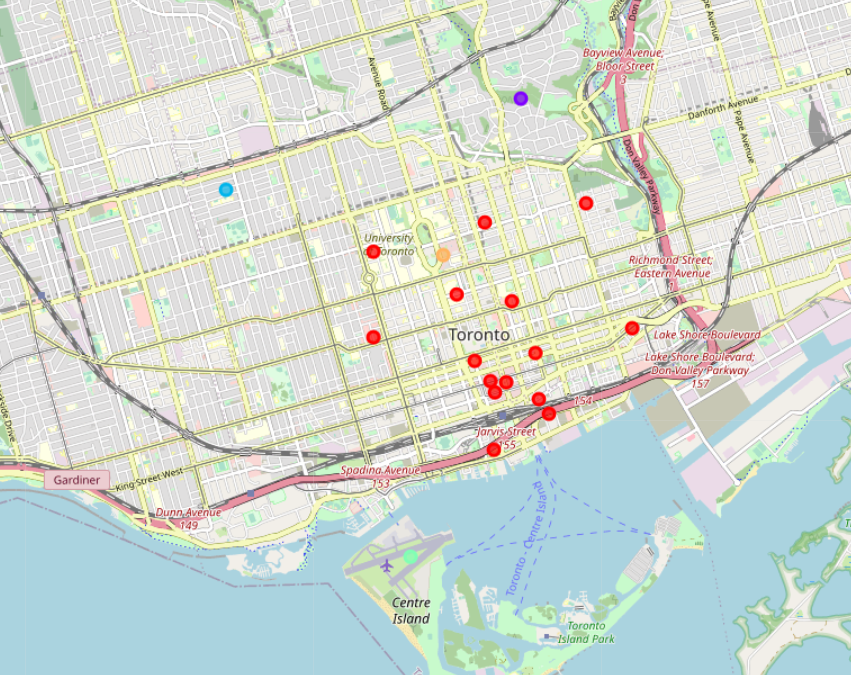

**Conclusion B1:** we have clustered into 5 clusters: we find 4 cluster with one neighboorhood and 1 cluster contains all the rest. 

In [237]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 0, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,0,Coffee Shop,Pub,Bakery,Park,Restaurant,Breakfast Spot,Café,Theater,Farmers Market,Performing Arts Venue
2,Downtown Toronto,0,Clothing Store,Coffee Shop,Bubble Tea Shop,Café,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Tea Room,Lingerie Store,Hotel
3,Downtown Toronto,0,Café,Coffee Shop,Restaurant,Clothing Store,Cosmetics Shop,Cocktail Bar,American Restaurant,Gastropub,Seafood Restaurant,Breakfast Spot
4,Downtown Toronto,0,Coffee Shop,Farmers Market,Cheese Shop,Bakery,Café,Seafood Restaurant,Beer Bar,Cocktail Bar,Restaurant,Hotel
5,Downtown Toronto,0,Coffee Shop,Italian Restaurant,Café,Sandwich Place,Japanese Restaurant,Department Store,Salad Place,Burger Joint,Bubble Tea Shop,Pizza Place
7,Downtown Toronto,0,Coffee Shop,Café,Clothing Store,Restaurant,Hotel,Bar,Thai Restaurant,Steakhouse,Gym,Bookstore
8,Downtown Toronto,0,Coffee Shop,Aquarium,Café,Hotel,Restaurant,Fried Chicken Joint,Brewery,Scenic Lookout,Park,Bar
9,Downtown Toronto,0,Coffee Shop,Hotel,Café,Restaurant,American Restaurant,Salad Place,Japanese Restaurant,Seafood Restaurant,Italian Restaurant,Asian Restaurant
10,Downtown Toronto,0,Coffee Shop,Restaurant,Café,Hotel,American Restaurant,Gym,Italian Restaurant,Deli / Bodega,Seafood Restaurant,Japanese Restaurant
11,Downtown Toronto,0,Café,Japanese Restaurant,Restaurant,Bar,Bookstore,Sandwich Place,Bakery,Italian Restaurant,Beer Bar,Beer Store


In [238]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 1, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,Downtown Toronto,1,Park,Playground,Trail,Creperie,Doner Restaurant,Dog Run,Distribution Center,Discount Store,Diner,Dessert Shop


In [239]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 2, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Downtown Toronto,2,Grocery Store,Café,Park,Nightclub,Diner,Candy Store,Italian Restaurant,Athletics & Sports,Coffee Shop,Baby Store


In [240]:
downtown_merged.loc[downtown_merged['Cluster Labels'] == 3, downtown_merged.columns[[1] + list(range(5, downtown_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Downtown Toronto,3,Airport Terminal,Airport Lounge,Airport Service,Sculpture Garden,Rental Car Location,Boutique,Harbor / Marina,Coffee Shop,Airport Food Court,Airport


*Conclusion 2B:* 

Cluster 3 has a single (unique) neigboorhood beacuase it is the only one with an airport

cluster 2 and 1 seem to be far from downtown center (and maybe that is why they have only one neighboorhood ?) 